# 可視化の意味
- 大量のデータをグラフで表現すると、その特徴、傾向が直感的に理解しやすくなる
- データの種類によって適したグラフを選択する必要がある
- データを予め表形式(dataframe)にしておくと、可視化しやすい

# 平均寿命と医療支出のデータセット
以下のような表形式(dataframe)データから、いろいろなグラフで可視化を試みる

  1. 平均寿命の推移
  2. 上記の国別推移
  3. 2020年における国別平均寿命の比較
  2. 2020年における国別医療支出の比較（3.と比較できるように両方を描画する）
  3. 1970年における国別平均寿命、国別医療支出の比較
  4. 医療支出と平均寿命の関連性を可視化する



In [1]:
import seaborn as sns

lifespan = sns.load_dataset("healthexp")
lifespan


,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9
...,...,...,...,...
269,2020,Germany,6938.983,81.1
270,2020,France,5468.418,82.3
271,2020,Great Britain,5018.700,80.4
272,2020,Japan,4665.641,84.7


# 1. グラフライブラリ　matplotlib　で折れ線グラフを描く


### 1) 折れ線グラフを描く

**構文**

---
```python
import matplotlib.pyplot as plt 　->　matplotlibを使う宣言
plt.plot(x, y) -> 折れ線グラフを描く関数 x: 時間軸の配列 y:時間軸での値の配列　xとyの要素数は一致する必要がある
plt.show() -> グラフを可視化する
```
---
外国人訪問者数の推移

0     1970
1     1971
2     1972
3     1973
4     1974
5     1975
6     1976
7     1977
8     1978
9     1979
10    1980
11    1981
12    1982
13    1983
14    1984
15    1985
16    1986
17    1987
18    1988
19    1989
20    1990
21    1991
22    1992
23    1993
24    1994
25    1995
26    1996
27    1997
28    1998
29    1999
30    2000
31    2001
32    2002
33    2003
34    2004
35    2005
36    2006
37    2007
38    2008
39    2009
40    2010
41    2011
42    2012
43    2013
44    2014
45    2015
46    2016
47    2017
48    2018
49    2019
50    2020
Name: Year, dtype: int64
0     71.520000
1     71.920000
2     71.800000
3     72.033333
4     72.400000
5     72.850000
6     73.325000
7     73.700000
8     73.866667
9     74.500000
10    74.233333
11    74.620000
12    74.920000
13    75.120000
14    75.420000
15    75.616667
16    75.860000
17    76.180000
18    76.260000
19    76.480000
20    76.916667
21    77.060000
22    77.100000
23    77.083333
24    77.450000
25    77.45000

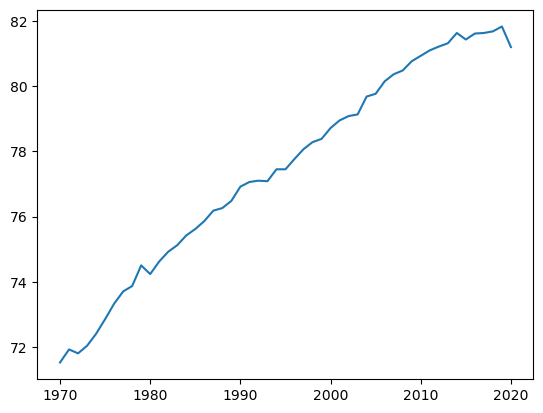

In [2]:
import matplotlib.pyplot as plt
ls_country = lifespan.groupby('Year',as_index=False).mean(numeric_only=True)
x = ls_country['Year']
y = ls_country['Life_Expectancy']
print(x)
print(y)
plt.plot(x, y)
plt.show()

国籍別の推移

### 2) グラフを重ねて表示

**構文**

---
```python
import matplotlib.pyplot as plt 　->　matplotlibを使う宣言

グラフを関数を必要なだけ書く

plt.show() -> グラフを可視化する（上記のグラフを重ね合わせて表示する）
```
---

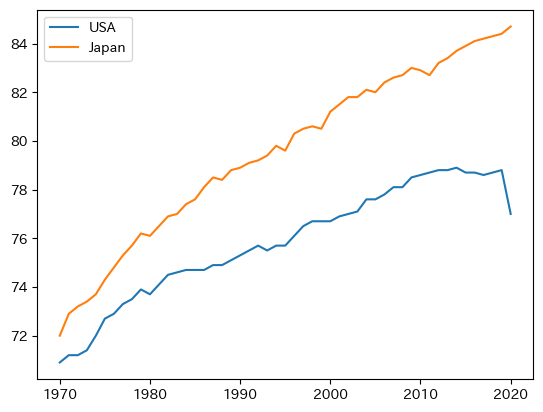

In [3]:
import japanize_matplotlib
us = lifespan[lifespan['Country'] == 'USA' ]
jpn = lifespan[lifespan['Country'] == 'Japan' ]
x = us['Year']
y = us['Life_Expectancy']
plt.plot(x, y,label='USA')
x = jpn['Year']
y = jpn['Life_Expectancy']
plt.plot(x, y,label='Japan')
plt.legend()
plt.show()

#### 全国籍を上記の方法で描くのは大変！
# 2.グラフライブラリ seaborn による折れ線グラフ
1. matplotlibと比較してグラフを少ないコードで描くことができる
3. DataFrameからのグラフ描画に特化（matplotlibは様々なデータ型に対応）：凡例、軸名などを自動表示する
4. 定型的なグラフだけに特化。matplotlibのほうが柔軟。
5. ケースバイケースでmatplotlibとseabornを使い分ける

**構文** 

---
```python
import seaborn as sns
sns.relplot(x=DataFrameの時間軸のカラム名, y=DataFrameで時間毎に表示したいカラム名,  data=,DataFrame名, kind="line",  hue=重ねたいグラフの凡例)
```
---

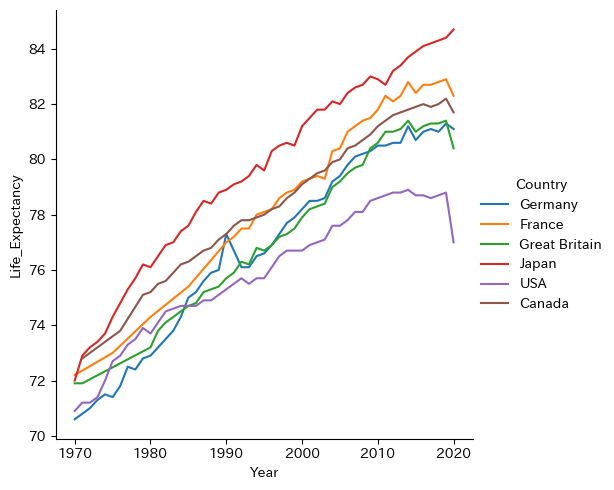

In [4]:
import seaborn as sns
import japanize_matplotlib

sns.relplot(x="Year", y="Life_Expectancy",  data=lifespan, kind="line",  hue="Country")
plt.show()

# 3. seabornで棒グラフを描く 
### 1) 2020年における国別平均寿命の比較

**構文**

---
```python
sns.barplot( x = DataFrameのカラム名, y=DataFrameの列名,  data=,DataFrame名)
```

---


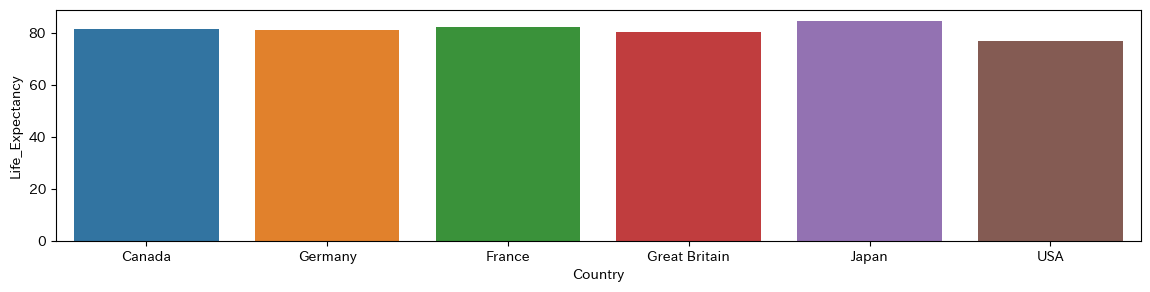

In [5]:
lifespan_2020 = lifespan[lifespan['Year']==2020]
plt.figure(figsize=[14,3])
sns.barplot( x = "Country", y = "Life_Expectancy",data=lifespan_2020)
plt.show()

# 4. 複数のグラフ描画区画を用意する
### 1) 1980と2020の国別平均寿命を左右対称する
   
**構文**

---
```python
fig,ax = plt.subplots(グラフ区画の行数,グラフ区画の列数,figsize=(,))

## 上記で定義したグラフ区画数分グラフ描画するコーディングを書く
## この際に、各グラフをどの区画に対応付けるかは、ax=で指定する
　　　例：sns.barplot( ーーーー,ax=ax[0])
```
---

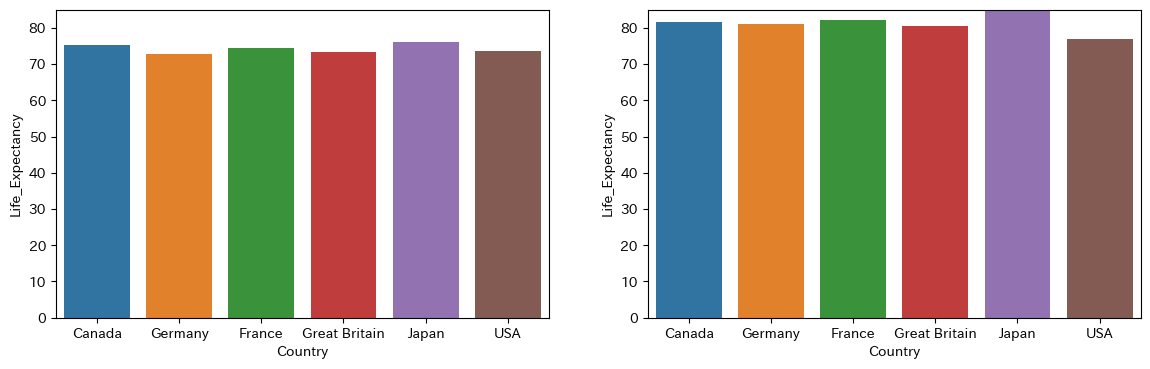

In [6]:
fig,ax = plt.subplots(1,2,figsize=(14,4))
lifespan_2020 = lifespan[lifespan['Year']==2020]
lifespan_1970 = lifespan[lifespan['Year']==1980]
sns.barplot( x = "Country", y = "Life_Expectancy",data=lifespan_1970,ax=ax[0])
sns.barplot( x = "Country", y = "Life_Expectancy",data=lifespan_2020,ax=ax[1])
ax[0].set_ylim(0, 85)
ax[1].set_ylim(0, 85) #縦軸のスケールをそろえる
plt.show()

### 2) 上段は上記と同じグラフを、下段は1980,2020の国別の医療支出費を表示する（つまり4区画表示する）

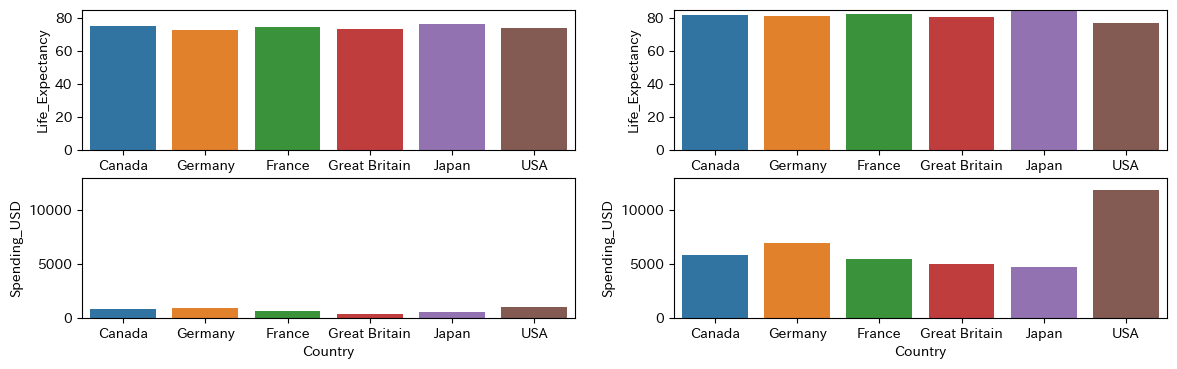

In [7]:
fig,ax = plt.subplots(2,2,figsize=(14,4))
lifespan_2020 = lifespan[lifespan['Year']==2020]
lifespan_1970 = lifespan[lifespan['Year']==1980]
sns.barplot( x = "Country", y = "Life_Expectancy",data=lifespan_1970,ax=ax[0,0])
sns.barplot( x = "Country", y = "Life_Expectancy",data=lifespan_2020,ax=ax[0,1])
sns.barplot( x = "Country", y = "Spending_USD",data=lifespan_1970,ax=ax[1,0])
sns.barplot( x = "Country", y = "Spending_USD",data=lifespan_2020,ax=ax[1,1])
ax[0,0].set_ylim(0, 85)
ax[0,1].set_ylim(0, 85) #縦軸のスケールをそろえる
ax[1,0].set_ylim(0, 13000)
ax[1,1].set_ylim(0, 13000) #縦軸のスケールをそろえる
plt.show()

- 医療支出は非常に負担が大きくなっている割に、平均寿命はせいぜい5歳程度しか伸びていない。特に米国はほとんど寿命が延びていない

# 5. 散布図を描く
医療支出と平均寿命の関連性

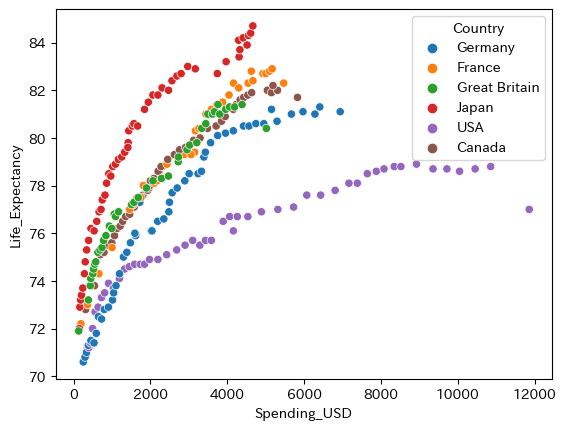

In [10]:
ax = sns.scatterplot(data=lifespan, x = "Spending_USD", y = "Life_Expectancy", hue = "Country")

**医療支出のわりに寿命があまり伸びていない国は米国、逆に寿命が非常に伸びているのが日本**